<a href="https://colab.research.google.com/github/cij1012/pytrorch/blob/master/%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4_mydata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random

In [2]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("학습", device)

학습 cuda


In [0]:
torch.manual_seed(1012)
if device == 'cuda':
  torch.cuda.manual_seed_all(1012)

In [0]:
kmnist_train = dsets.KMNIST(root='KMNIST_data/',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)
kmnist_test = dsets.KMNIST(root='KMNIST_data/',
                          train=False,
                          transform=transforms.ToTensor(),
                          download=True)

In [0]:
training_epochs = 15
batch_size = 100

In [0]:
data_loader = DataLoader(dataset=kmnist_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

In [0]:
linear = nn.Linear(784, 10, bias=True).to(device)

In [0]:
cost = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(),lr=0.1)

In [18]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for X,Y in data_loader:
    X = X.view(-1,28 * 28).to(device)
    Y = Y.to(device)

    optimizer.zero_grad()
    hypothesis = linear(X)
    cost_new = cost(hypothesis, Y)
    cost_new.backward()
    optimizer.step()

    avg_cost += cost_new / total_batch
  print('Epoch','%04d' % (epoch+1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning finished')

Epoch 0001 cost = 0.803002059
Epoch 0002 cost = 0.639214993
Epoch 0003 cost = 0.612720847
Epoch 0004 cost = 0.599044323
Epoch 0005 cost = 0.589987159
Epoch 0006 cost = 0.584010243
Epoch 0007 cost = 0.579033852
Epoch 0008 cost = 0.574843407
Epoch 0009 cost = 0.571926236
Epoch 0010 cost = 0.569032967
Epoch 0011 cost = 0.566959023
Epoch 0012 cost = 0.565079033
Epoch 0013 cost = 0.563344538
Epoch 0014 cost = 0.561343551
Epoch 0015 cost = 0.560625196
Learning finished


Label :  6
Prediction :  6


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


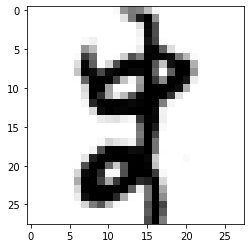

In [40]:
with torch.no_grad():
  X_test = kmnist_test.test_data.view(-1, 28 * 28).float().to(device)
  Y_test = kmnist_test.test_labels.to(device)

  prediction = linear(X_test)
  correct_pred = torch.argmax(prediction, 1)==Y_test
  accuaracy = correct_pred.float().mean()

  r = random.randint(0, len(kmnist_test)-1)
  X_single = kmnist_test.test_data[r:r+1].view(-1, 28 * 28).float().to(device)
  Y_single = kmnist_test.test_labels[r:r+1].to(device)

  print('Label : ',Y_single.item())
  single_pred = linear(X_single)
  print('Prediction : ', torch.argmax(single_pred, 1).item())

  plt.imshow(kmnist_test.test_data[r:r+1].view(28,28), cmap='Greys', interpolation='nearest')
  plt.show()